In [ ]:
#Homework 4 - AST4930 - Grady Robbins
#run once:
!pip install pytransit
!pip install pyrr
!pip install emcee
!pip install corner

In [1]:
#Import Modules
import numpy as np
import matplotlib.pyplot as plt

for 10^2, pi ~ 3.0
for 10^3, pi ~ 3.192
for 10^4, pi ~ 3.1456
for 10^5, pi ~ 3.14664


Text(0.5, 1.0, '10^5 points')

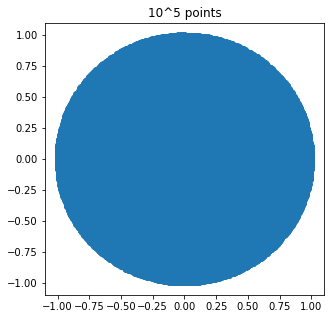

In [2]:
#1a
for i in range(2,6):
    N_ins = 0
    N_tot = 10**i
    x=[]
    y=[]
    xplt=[]
    yplt=[]
    for n in range(N_tot):
        x.append(np.random.uniform(-1,1))
        y.append(np.random.uniform(-1,1))
    for n in range(N_tot):
        if (x[n]**2 + y[n]**2) <= 1:
            N_ins +=1
            xplt.append(x[n])
            yplt.append(y[n])
    print('for 10^'+str(i)+', pi ~',4*N_ins/N_tot)
fig = plt.figure(figsize=(5,5))
plt.scatter(xplt,yplt)
plt.title('10^'+str(i)+' points')

for 2000 points, pi ~ 3.182

the transit depth here is ~ 0.8170961659333752 %

if the planet were seen at the center of the star, the transit depth would be ~ 0.814456604734029 % using 10000 points
after testing, you should use an N_total of around 10000 to be within ~ 10% accuracy most of the time


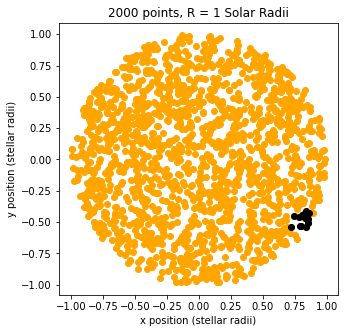

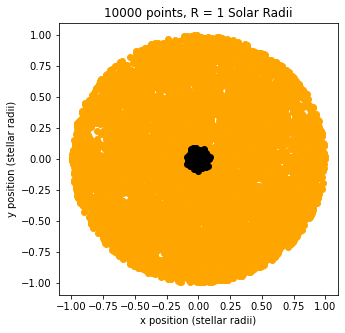

In [5]:
#1b
#center of second circle at (0.8,-0.5), radius of 0.1
N_transit = 0
N_ins = 0
N_tot = 2000
x=[]
y=[]
xstar=[]
ystar=[]
xplanet=[]
yplanet=[]
xtransit=[]
ytransit=[]
for n in range(N_tot):
    x.append(np.random.uniform(-1,1))
    y.append(np.random.uniform(-1,1))
for n in range(N_tot):
    if (x[n]**2 + y[n]**2) <= 1:
        N_ins +=1
        xstar.append(x[n])
        ystar.append(y[n])
    if ((x[n]-0.8)**2 + (y[n]+0.5)**2) <= 0.1**2:
        xplanet.append(x[n])
        yplanet.append(y[n])
for n in range(len(xplanet)):
    if (xplanet[n]**2 + yplanet[n]**2) <= 1:
        N_transit +=1
        xtransit.append(xplanet[n])
        ytransit.append(yplanet[n])
print('for 2000 points, pi ~',4*N_ins/N_tot)
print()
print('the transit depth here is ~',N_transit/N_ins*100,'%')
fig = plt.figure(figsize=(5,5))
plt.scatter(xstar,ystar, color = 'orange')
plt.scatter(xtransit,ytransit, color = 'black')
plt.xlabel('x position (stellar radii)')
plt.ylabel('y position (stellar radii)')
plt.title('2000 points, R = 1 Solar Radii')
#---------transit at star center------------
N_transit = 0
N_ins = 0
N_tot = 10000
x=[]
y=[]
xstar=[]
ystar=[]
xplanet=[]
yplanet=[]
xtransit=[]
ytransit=[]
for n in range(N_tot):
    x.append(np.random.uniform(-1,1))
    y.append(np.random.uniform(-1,1))
for n in range(N_tot):
    if (x[n]**2 + y[n]**2) <= 1:
        N_ins +=1
        xstar.append(x[n])
        ystar.append(y[n])
    if ((x[n])**2 + (y[n])**2) <= 0.1**2:
        xplanet.append(x[n])
        yplanet.append(y[n])
for n in range(len(xplanet)):
    if (xplanet[n]**2 + yplanet[n]**2) <= 1:
        N_transit +=1
        xtransit.append(xplanet[n])
        ytransit.append(yplanet[n])
print()
print('if the planet were seen at the center of the star, the transit depth would be ~',N_transit/N_ins*100,'% using 10000 points')
fig = plt.figure(figsize=(5,5))
plt.scatter(xstar,ystar, color = 'orange')
plt.scatter(xtransit,ytransit, color = 'black')
plt.xlabel('x position (stellar radii)')
plt.ylabel('y position (stellar radii)')
plt.title('10000 points, R = 1 Solar Radii')
print('after testing, you should use an N_total of around 10000 to be within ~ 10% accuracy most of the time')

In [6]:
#2a
#unique star and planet properties:
Mstar_solar = 0.72 #solar masses
Rstar = 0.77 #solar radii
P = 4.931 #days
i = 89.57*np.pi/180 #rad, inclination
e = 0.8 #eccentricity
peri = 62.86*np.pi/180 #rad, longitude of periaps
Rplanet = 4.16 #Earth radii
Mplanet = 20.8 #Earth masses



The semimajor axis of this orbit is 0.05076730399152996AU


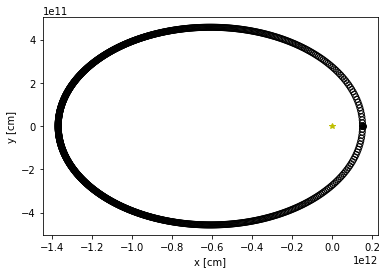

the black circle is the starting point of the orbit
the velocity of the planet at transit is 33720272.417609915 cm/s


In [7]:
#orbital code from hw 3:
                                                                                   
#Orbit computes the orbit of a small mass about a much larger mass.                                           
                                                                                            
#Adapted from:                                                                                                                                                                                                           
#"An Introduction to Modern Astrophysics", Appendix J                                                         
#Bradley W. Carroll and Dale A. Ostlie                                                                        
#Second Edition, Addison Wesley, 2007                                                                                                                                                                                                                                               
###################################################################

#Import needed packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
from decimal import Decimal

#Define needed constants
G = 6.67E-8                 ##units: cm**3 / g / s**2
cm_per_AU = 1.5E13          ##units: cm
Msun = 2.0E33                ##units: g
Mearth = 5.972E27            ##units: g
s_per_day = 60. * 60. * 24. ##units: s
R_sun=6.955e10 #cm

#Prompt user for input variables
ecc = e
omega = 0
Mplanet = Mplanet
Planet_period_days = P
Planet_period_seconds = Planet_period_days*s_per_day

#TO DO: Convert input values to cgs units 
Mstar = Mstar_solar*Msun # star mass to grams
Mplanet = Mplanet*Mearth #planet mass to grams
semi_maj = (((Planet_period_seconds**2)*G*(Mstar))/(4*(np.pi**2)))**(1/3) #semimajor axis to centimeters

omega = omega*np.pi/180 #define orbital rotation
#TO DO: Calculate the orbital period with Kepler's 3rd Law  
#P**2 = a**3 *4*pi**2 / (G*Mstar) planet mass << star mass
#TO DO: Output period of orbit to user and prompt for # of steps (replace placeholder period with real period)

print("The semimajor axis of this orbit is " + str(semi_maj/cm_per_AU) + "AU")
#nstep = float(input("Number of time steps to be calculated: "))
nstep = 1000
#TO DO: Calculate timestep size.                                                                                     
step_size_s = Planet_period_seconds / nstep

#TO DO: Define intial values for variables to be changed with each time step.                                                    

rmin = (semi_maj*(1-ecc**2))/(1+ecc) #define rmin, rmax for reference
rmax = (semi_maj*(1-ecc**2))/(1-ecc)
theta = 2*np.pi - omega #inital rotation
r = (semi_maj*(1-ecc**2))/(1+(ecc*np.cos(theta)))
r0 = r
x = r*np.cos(theta)
y = r*np.sin(theta)
x0 = x
y0 = y
t = 0
Lpermass = (G*Mstar*semi_maj*(1-ecc**2))**(1/2)
x_list = [x] #creating lists to append and graph
y_list = [y]
t_list = [t]
r_list = [r]
#TO DO: Make time steps move forward (for loop or while statement)
for n in range(int(nstep)):    
    deltheta = Lpermass*step_size_s/(r**2)
    #TO DO: within the for or while loop, perform the following steps
    theta = theta + deltheta
    #Calculate distance of object from principle focus                                                        
    r = (semi_maj*(1-ecc**2))/(1+(ecc*np.cos(theta)))
    #Calculate cartesian coordinates and save to array                                                        
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #Update time                                                                                                                                                                   
    t = t + step_size_s
    #Calculate angular momentum per unit mass.   (doesn't change)                                                             
    #Calculate next theta value based on ang. momentum per unit mass.
    x_list.append(x)
    y_list.append(y)
    t_list.append(t)
    r_list.append(r)

#TO DO: Plot orbital path.  

#These are placeholder X and Y arrays-- yours will contain the X and Y positions of the planet
x_arr = np.array(x_list)
y_arr = np.array(y_list) #converting to arrays for math
t_arr = np.array(t_list)
r_arr = np.array(r_list)
rmin = min(r_list)

for n in range(len(r_list)):
    if rmin == r_list[n]:
        T_peri_eff = t_list[n] #calculating time of perihelion
        
dxdt = ((x_arr[0:-1] - x_arr[1:])/(t_arr[0:-1]-t_arr[1:]))
dydt = ((y_arr[0:-1] - y_arr[1:])/(t_arr[0:-1]-t_arr[1:]))
speed = ((dxdt**2 + dydt**2)**(.5)) 
Kinetic_E = .5*Mplanet*(speed**2)
Potential_E = -G*Mplanet*Mstar/r_arr

T_peri_real = (T_peri_eff) / s_per_day
t_list_day = t_arr / s_per_day/ 365
#fig = plt.figure(figsize=(5,5))
plt.scatter(x_arr, y_arr, facecolors = 'none', edgecolors = 'black')    #Orbital path                                            
plt.plot(0, 0, 'y*')    #Stellar host
plt.plot(x0, y0, 'ko') #stating point
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.show()
print('the black circle is the starting point of the orbit')
print('the velocity of the planet at transit is',speed[0],'cm/s')

In [8]:
#From jupyter notebook:
period=4.931 #insert your period here in days

##### DO NOT ALTER THIS. This snippet of code calculates the time array you should use to generate your lightcurves, 
#both from scratch and using exisiting python packages
M_star_low=0.1
M_star_high=10.0

R_high=((M_star_high)**0.57)*R_sun #MR scaling relations for MS stars
R_low=((M_star_low)**0.8)*R_sun

a_high=(((period*s_per_day)**2.0*G*M_star_high*Msun)/(4*np.pi**2.0))**(1.0/3.0)
a_low=(((period*s_per_day)**2.0*G*M_star_low*Msun)/(4*np.pi**2.0))**(1.0/3.0)

duration_high=period*s_per_day/np.pi*(R_high/a_high)
duration_low=period*s_per_day/np.pi*(R_low/a_low)

#Calculating number of 1 min exoposure needed for a 3 hour duration window, 
#if eccentricity is as high as 0.9 and planet transits at apastron
n_high=3*duration_high*(np.sqrt(1-0.9**2)/(1-0.9))/60.
n_low=3*duration_low*(np.sqrt(1-0.9**2)/(1-0.9))/60.

single_transit_time_array=(np.arange(0,n_high)-n_high/2.0)/(60*24) #Short time array in days, centered on a single transit event

the planets position intersects the center of the star (origin) between -5 and 5 solar radii as expected


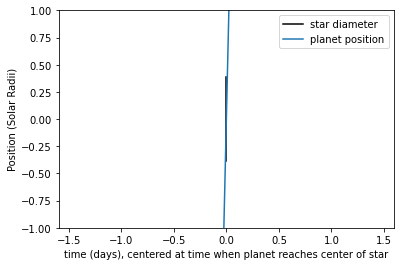

In [31]:
position = single_transit_time_array*24*3600*speed[0] #position in cm
position_Rsun = position/R_sun
plt.plot(np.linspace(0,0,10),np.linspace(-0.385,0.385,10),color="black",label = 'star diameter')
plt.plot(single_transit_time_array, position_Rsun, label = 'planet position')
#plt.plot(single_transit_time_array, np.linspace(-5,5,len(single_transit_time_array)))
plt.xlabel('time (days), centered at time when planet reaches center of star')
plt.ylabel('Position (Solar Radii)')
plt.ylim(-1,1)
plt.legend()
print('the planets position intersects the center of the star (origin) between -5 and 5 solar radii as expected')